In [3]:
import os
import pandas as pd
import numpy as np

from nloop import Text

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

Here we go through some of the main features of `nloop` using the IMDB movie data. 

In [4]:
data_fname = os.path.join("nloop", "data", "IMDB-Movie-Data.csv")
data = pd.read_csv(data_fname)

In [5]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Text Class

NLOOP converts your corpus (list of documents) into an object called `Text` which has lots of convenient attributes and methods. All you need to do is to instantiate `Text()` with your corpus (in this case the movie descriptions). Behind the scene, your documents will be passed through a spacy nlp pipeline and will be tokenized, stop words are removed, and only certain parts of speech (POS) will be kept. You can adjust these by changing the arguments of `Text`. 

If `fast=True`, the spacy nlp pipeline will only contain the `tagger`. This is useful if you only want to tokenize and clean the corpus, but if you need more features (noun_chunks, named_entities, keywords, sentences, etc.) use `fast=False`.  

In [48]:
text = Text(data["Description"], fast=False)

model en
Only keeping: ['ADJ', 'NOUN', 'PROPN', 'VERB']
nlp.pipe_names = ['tagger', 'parser', 'ner', 'textrank']



looping


Let's have a look at what this `text` object has to offer. You can see the original documents using `.docs`. Each element of the list is a spacy `Doc` object. We're going to focus on the first three elements. 

In [98]:
print(text.docs[:3])

[A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe., Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone., Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.]


To see the tokenized docs you can use `.raw_tokens`. Each element is a list of spacy `Token` object.

In [97]:
print(text.raw_tokens[:3])

[[A, group, of, intergalactic, criminals, are, forced, to, work, together, to, stop, a, fanatical, warrior, from, taking, control, of, the, universe, .], [Following, clues, to, the, origin, of, mankind, ,, a, team, finds, a, structure, on, a, distant, moon, ,, but, they, soon, realize, they, are, not, alone, .], [Three, girls, are, kidnapped, by, a, man, with, a, diagnosed, 23, distinct, personalities, ., They, must, try, to, escape, before, the, apparent, emergence, of, a, frightful, new, 24th, .]]


And the clean tokens are stored in `.tokens`. Notice that this list only contains the lemmas and no stop words. 

In [96]:
print(text.tokens[:3])

[['group', 'intergalactic', 'criminal', 'force', 'work', 'stop', 'fanatical', 'warrior', 'take', 'control', 'universe'], ['follow', 'clue', 'origin', 'mankind', 'team', 'find', 'structure', 'distant', 'moon', 'realize'], ['girl', 'kidnap', 'man', 'diagnosed', 'distinct', 'personality', 'try', 'escape', 'apparent', 'emergence', 'frightful', 'new']]


The clean tokens are put together as `.clean_docs`. 

In [95]:
print(text.clean_docs[:3])

['group intergalactic criminal force work stop fanatical warrior take control universe', 'follow clue origin mankind team find structure distant moon realize', 'girl kidnap man diagnosed distinct personality try escape apparent emergence frightful new']


Here are some other useful features of `text`...
    
A token counter (an instance of nltk Counter):

In [75]:
text.token_counter.most_common(8)

[('life', 112),
 ('find', 108),
 ('man', 81),
 ('world', 81),
 ('new', 73),
 ('family', 72),
 ('young', 69),
 ('discover', 55)]

A word cloud:

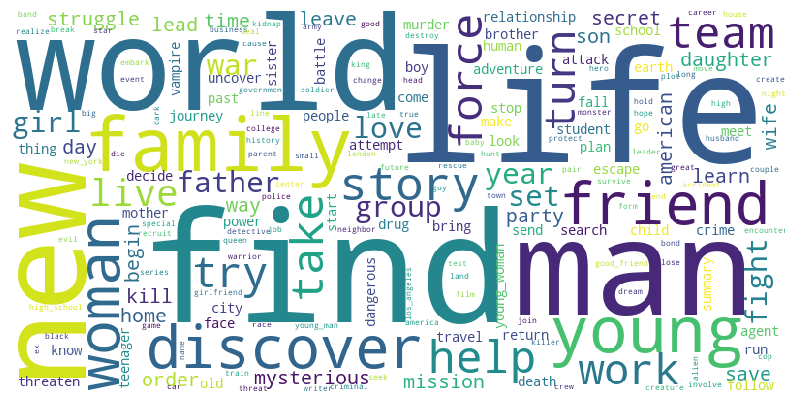

In [77]:
text.show_wordcloud()

And an exact keword seach method:

In [79]:
text.search_for_token("Friend", exact=True)

Looking for 'Friend' in all the raw_docs...

Document # 678:


[678]

# Bow and TFiDF

You can easily access the gensim bow (bag of words) and TFiDF (term frequency inverse document frequency) vectors by calling `corpus_bow` and `corpus_tfidf` off of `text`. 

In [112]:
text.corpus_bow[:3]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)]]

In [114]:
text.corpus_tfidf[:3]

[[(0, 0.31291394302718467),
  (1, 0.2950867112011507),
  (2, 0.46937091454077695),
  (3, 0.20775954761378967),
  (4, 0.21871746011451199),
  (5, 0.3751744316281043),
  (6, 0.25342724361356433),
  (7, 0.21071429136711367),
  (8, 0.347623726526237),
  (9, 0.2950867112011507),
  (10, 0.2154022465535337)],
 [(11, 0.30608032994344253),
  (12, 0.358772861605294),
  (13, 0.14644683139385034),
  (14, 0.2510247056213102),
  (15, 0.34427346522366337),
  (16, 0.358772861605294),
  (17, 0.34427346522366337),
  (18, 0.2930411722418328),
  (19, 0.44885133945112315),
  (20, 0.20007431280674995)],
 [(21, 0.3459324625287002),
  (22, 0.3845160879590479),
  (23, 0.3845160879590479),
  (24, 0.3233624885100756),
  (25, 0.21245504875329713),
  (26, 0.3845160879590479),
  (27, 0.18504163820040778),
  (28, 0.24173970794671049),
  (29, 0.14129337277634538),
  (30, 0.14882706838660067),
  (31, 0.3459324625287002),
  (32, 0.18058610849773812)]]

`.bow_transformer()` and `.tfidf_transformer()` allow you to convert new documents to bow or tfidf vectors.

In [119]:
new_doc = "An intergalactic alien tried to save the world with her friends."

In [120]:
text.bow_transformer(new_doc)

[(5, 1), (44, 1), (234, 1), (243, 1)]

In [121]:
text.tfidf_transformer(new_doc)

[(5, 0.6689171334952856),
 (44, 0.433172887849257),
 (234, 0.5171466824677315),
 (243, 0.312202540927207)]

or you can use `.bow2tfidf` to convert your bow vector to tfidf vector.

In [123]:
text.bow2tfidf([(5, 1), (44, 1), (234, 1), (243, 1)])

[(5, 0.6689171334952856),
 (44, 0.433172887849257),
 (234, 0.5171466824677315),
 (243, 0.312202540927207)]

# Similarity Matrix

`text.similarity` is an inner class that can be used to calculate cosine similarity between all the corpus documents 

In [124]:
text.similarity.matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.02506651],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.02506651, 0.        , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [125]:
text.similarity.matrix.shape

(1000, 1000)

or between the corpus documents and a new document

In [133]:
new_doc = "An intergalactic alien tried to save the world with her friends."
new_doc_bow = text.bow_transformer(new_doc)

# find the cosine similarity with other documents
cos_sim = text.similarity.index(new_doc_bow)

In [134]:
cos_sim.shape

(1000,)

In [162]:
# find the index of the 3 most similar documents
sorted_indx = np.argsort(cos_sim)[::-1][:3]

In [170]:
#show the title and description of the matches from the original dataframe
pd.set_option("display.max_colwidth", -1)
data.loc[sorted_indx][["Title", "Description"]]

,Title,Description
454,I Am Number Four,"Aliens and their Guardians are hiding on Earth from intergalactic bounty hunters. They can only be killed in numerical order, and Number Four is next on the list. This is his story."
316,The 5th Wave,"Four waves of increasingly deadly alien attacks have left most of Earth decimated. Cassie is on the run, desperately trying to save her younger brother."
528,Godzilla,"The world is beset by the appearance of monstrous creatures, but one of them may be the only one who can save humanity."


As another example let's use the similarity matrix of the most popular movies to perform hierarchical clustering.

In [173]:
data_subset = data[(data.Rating>8) & (data.Votes>500000)]
text_subset = Text(data_subset["Description"])

spacy_model: en"
Only keeping: ['ADJ', 'NOUN', 'PROPN', 'VERB']
nlp.pipe_names = ['tagger']


In [174]:
text.similarity.index(text_subset.corpus_tfidf)

array([[0.977427  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.94237715, 0.        , ..., 0.        , 0.        ,
        0.06559458],
       [0.07963561, 0.10195425, 0.8130899 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.05467807,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04249728]], dtype=float32)

In [175]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [176]:
links = linkage(text.similarity.index(text_subset.corpus_tfidf), method="complete")

In [181]:
titles = data_subset["Title"].values
genres = data_subset["Genre"].values

In [184]:
plot_labels = [title + "  |  " + genre for title,genre in zip(titles,genres)]

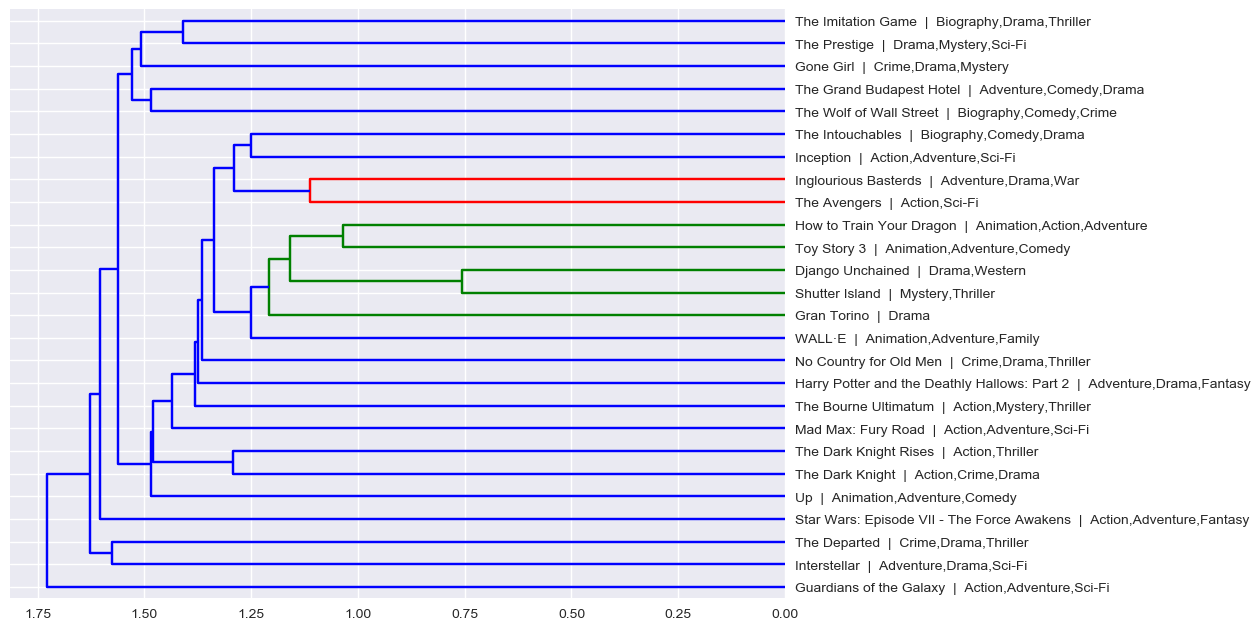

In [192]:
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

plt.figure(figsize=(10,0.3*len(plot_labels)),dpi=100)
_ = dendrogram(links, orientation="left", labels=plot_labels)
